# Importar datos

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dat2f0=np.loadtxt("pruebaEspectro_600_1.txt",float,usecols=(0,1))

datf0=np.loadtxt("pruebaEspectro_600_1_f.txt",float,usecols=(0,1))

#=====================================================================
dat2f1=np.loadtxt("pruebaEspectro_600_1_60mT.txt",float,usecols=(0,1))

datf1=np.loadtxt("pruebaEspectro_600_1_f_60mT.txt",float,usecols=(0,1))

# Definir arreglos

In [3]:
lamda= dat2f0[:,0]
#+++++++++++++++++++++=sin campo
f2SC=dat2f0[:,1]
fSC=datf0[:,1]
#+++++++++++++++++++++=con campo
f2C=dat2f1[:,1]
fC=datf1[:,1]


# Resta

In [4]:
Rf=fC-fSC
R2f=f2C-f2SC


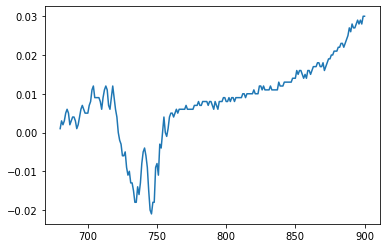

In [18]:
plt.plot(lamda,Rf)

# Datos de beamsplitter

In [5]:
datBS=np.loadtxt('03052021.BS_RBN.12h 26mn 13s.txt',float)
lamda2=datBS[:,0]
psi=datBS[:,1]
theta=datBS[:,2]
EnBs=np.around(1239.4/np.around(lamda2),2)
datosBS=np.stack((EnBs,psi,theta), axis=-1)

In [6]:
datosBS

array([[  1.   ,   3.189, 304.551],
       [  1.02 ,   2.099, 301.018],
       [  1.04 ,   1.397, 326.217],
       [  1.06 ,   1.23 , 353.323],
       [  1.08 ,   1.545,  25.496],
       [  1.1  ,   2.047,  37.881],
       [  1.12 ,   2.53 ,  41.065],
       [  1.14 ,   3.346,  39.01 ],
       [  1.16 ,   3.777,  32.198],
       [  1.18 ,   4.46 ,  25.121],
       [  1.2  ,   5.175,  18.151],
       [  1.22 ,   6.154,   9.962],
       [  1.24 ,   7.654,   3.146],
       [  1.26 ,   8.385, 357.438],
       [  1.28 ,  10.002, 351.86 ],
       [  1.3  ,  10.84 , 349.325],
       [  1.32 ,  11.594, 347.116],
       [  1.34 ,  11.316, 345.447],
       [  1.36 ,  10.563, 342.421],
       [  1.38 ,  10.236, 342.65 ],
       [  1.4  ,   8.891, 340.808],
       [  1.42 ,   7.893, 339.398],
       [  1.44 ,   6.308, 336.403],
       [  1.46 ,   4.709, 332.98 ],
       [  1.48 ,   3.02 , 327.214],
       [  1.5  ,   1.327, 313.861],
       [  1.52 ,   0.526, 206.136],
       [  1.54 ,   2.202, 15

# fiteo a longitud de onda

In [137]:
en=datosBS[:100,0]
ps=datosBS[:100,1]
delt=datosBS[:100,2]
dl=0.1
lam=np.arange(700,901,dl)

#  algoritmo 

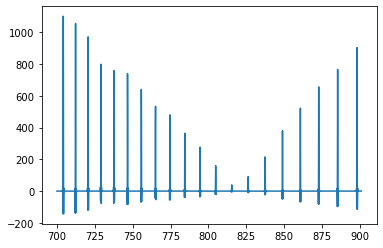

In [141]:
de=0.02

hc=1239.4

def b4(x,dx):
    b= (15120.-10080.*(x**2)/(dx**2)+1512.*(x**4)/(dx**4)-72.*(x**6)/(dx**6)+(x**8)/(dx**8))*np.e**(((-x**2)/(4.*dx**2)))
    #print (np.e**(-(x**2)/(4*dx**2)))
    return b

def fit(datAR,datN):
    for j in range(0,lam.size-1,1):
        suma=0
        for i in range(0,en.size-1,1):
            x1=lam[j]-(hc/en[i])
            b2=b4(x1,dl)
            suma=suma+(datAR[i]*b2*(1/(en[i]**2)))
        datN[j]= (hc/(12288*dl*np.sqrt(np.pi)))*de*suma

ndel=np.zeros(lam.size)
npsi=np.zeros(lam.size)

#fit(delt,ndel)
fit(ps,npsi)
                       
plt.plot(lam,npsi)          

1.3873080356553528e+42

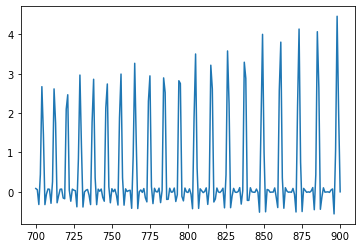

In [126]:
plt.plot(lam,npsi)